**GitHub Link:** https://github.com/mohinia09/HousePrice </br>
**Author:** Mohini Aggarwal

## **Importing Data**

In [14]:
#Importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [15]:
#Mounting the drive
#from google.colab import drive
#drive.mount('/content/drive')


In [16]:
#Importing the data
#df_house = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
df_house = pd.read_csv(r"C:\Users\Mohini\Desktop\UpGrad\ML2 Assignment\ML2 Assignment\ML2 Assignment/train.csv")

## **Inspecting the Data**

In [17]:
#Looking the data
df_house.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
#Known the shape of data
df_house.shape

(1460, 81)

In [19]:
#Know the data types
print(df_house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
#Know the stats
df_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## **Cleaning the Data**

In [21]:
# Drop column Id. Not required for analysis
df_house.drop('Id',axis=1,inplace=True)
df_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Type Correction

Converting column type for categorical variable from int64 to object

In [22]:
df_house.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [23]:
df_house.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [24]:
df_house.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [25]:
df_house['MSSubClass'] = df_house['MSSubClass'].astype('object')
df_house['OverallQual'] = df_house['OverallQual'].astype('object')
df_house['OverallCond'] = df_house['OverallCond'].astype('object')
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

### Missing Value Handling

### Column Missing Values

In [26]:
# List columns with missing values in decending order
df_house.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [27]:
# As per dictionary NA has a meaning of "No" for the following columns. Fill up with a new value "No <attribute>"
df_house['PoolQC'].fillna('No Pool', inplace=True)
df_house['MiscFeature'].fillna('None', inplace=True)
df_house['Alley'].fillna('No Alley', inplace=True)
df_house['Fence'].fillna('No Fence', inplace=True)
df_house['FireplaceQu'].fillna('No Fireplace', inplace=True)
df_house['GarageCond'].fillna('No Garage', inplace=True)
df_house['GarageType'].fillna('No Garage', inplace=True)
df_house['GarageFinish'].fillna('No Garage', inplace=True)
df_house['GarageQual'].fillna('No Garage', inplace=True)
df_house['BsmtExposure'].fillna('No Basement', inplace=True)
df_house['BsmtFinType2'].fillna('No Basement', inplace=True)
df_house['BsmtCond'].fillna('No Basement', inplace=True)
df_house['BsmtQual'].fillna('No Basement', inplace=True)
df_house['BsmtFinType1'].fillna('No Basement', inplace=True)


In [28]:
# Validate reduction in missing column values
df_house.isnull().sum().sort_values(ascending=False)[:20]

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
MasVnrType        8
Electrical        1
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
GarageFinish      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
GarageType        0
LowQualFinSF      0
2ndFlrSF          0
dtype: int64

#### Treating Missing Values

Column LotFrontage

In [29]:
#Fill with min value
df_house['LotFrontage'].fillna(df_house['LotFrontage'].min(), inplace=True) 

In [30]:
df_house['LotFrontage'].describe()

count    1460.00000
mean       61.34863
std        28.92032
min        21.00000
25%        42.00000
50%        63.00000
75%        79.00000
max       313.00000
Name: LotFrontage, dtype: float64

In [31]:
df_house['LotFrontage'].isnull().sum()

0

Column MasVnrArea


In [32]:
#Fill with min value
df_house['MasVnrArea'].fillna(df_house['MasVnrArea'].min(), inplace=True) 

In [33]:
df_house['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [34]:
df_house['MasVnrArea'].isnull().sum()

0

Column MasVnrType 


In [35]:
df_house.MasVnrType.value_counts(ascending=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [36]:
#NA equated to None
df_house['MasVnrType'].fillna('None', inplace=True)
df_house.MasVnrType.value_counts(ascending=False)

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [37]:
df_house['MasVnrType'].isnull().sum()

0

Column Electrical

In [38]:
df_house['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [39]:
# Only 1 missing value. Fill with mode of column = "SBrkr"
df_house.loc[pd.isnull(df_house['Electrical']), ['Electrical']] = 'SBrkr'
df_house['Electrical'].isnull().sum()

0

#### Row missing values

In [40]:
df_house.isnull().sum(axis=1).sort_values(ascending=False)[:10]

307    1
520    1
88     1
613    1
464    1
976    1
826    1
163    1
165    1
78     1
dtype: int64

Ordinal Categorical Variables

Column PoolQC

In [41]:
df_house.PoolQC.value_counts(ascending=False)

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [42]:
df_house['PoolQC'] = df_house.PoolQC.map({'No Pool':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_house.PoolQC.value_counts(ascending=False)

0    1453
3       3
4       2
1       2
Name: PoolQC, dtype: int64

Column FireplaceQu

In [43]:
df_house.FireplaceQu.value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [44]:
df_house['FireplaceQu'] = df_house.FireplaceQu.map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_house.FireplaceQu.value_counts()

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

Column GarageCond

In [45]:
df_house.GarageCond.value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [46]:
df_house['GarageCond'] = df_house.GarageCond.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_house.GarageCond.value_counts()

3    1326
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64

Column GarageQual

In [47]:
df_house.GarageQual.value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

In [48]:
df_house['GarageQual'] = df_house.GarageQual.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_house.GarageQual.value_counts()

3    1311
0      81
2      48
4      14
5       3
1       3
Name: GarageQual, dtype: int64

Column BsmtQual

In [49]:
df_house.BsmtQual.value_counts(ascending=False)

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [50]:
df_house['BsmtQual'] = df_house.BsmtQual.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5})
df_house.BsmtQual.value_counts(ascending=False)

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

Column BsmtCond


In [51]:
df_house.BsmtCond.value_counts(ascending=False)

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [52]:
df_house['BsmtCond'] = df_house.BsmtCond.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_house.BsmtCond.value_counts(ascending=False)

3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64

In [53]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

### Dropping Columns
Removing the columns that do not have many categories to add much value 

In [54]:
def getColumnsToDrop():
    column = []
    for col in (df_house.columns):
        if(df_house[col].value_counts().max() >= (0.90*len(df_house))):
            column.append(col)
    return column


In [55]:
columnsToDrop = getColumnsToDrop()
df_house.drop(columnsToDrop, axis = 1, inplace = True)
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   object 
 12  OverallCond    1460 non-null   object 
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

### EDA

### Plots

Text(0.5, 1.0, 'Sales Price v/s Overall Quality')

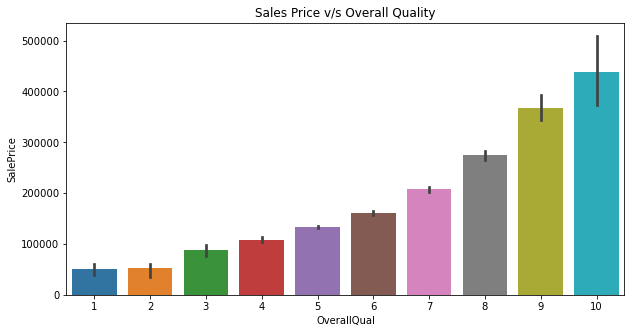

In [56]:
# plot 'OverallQual' with 'Saleprice'
plt.figure(figsize=(10, 5))
sns.barplot(x="OverallQual", y="SalePrice", data=df_house)
plt.title("Sales Price v/s Overall Quality")

An increasing trend with OveralCond observed

###Correlation

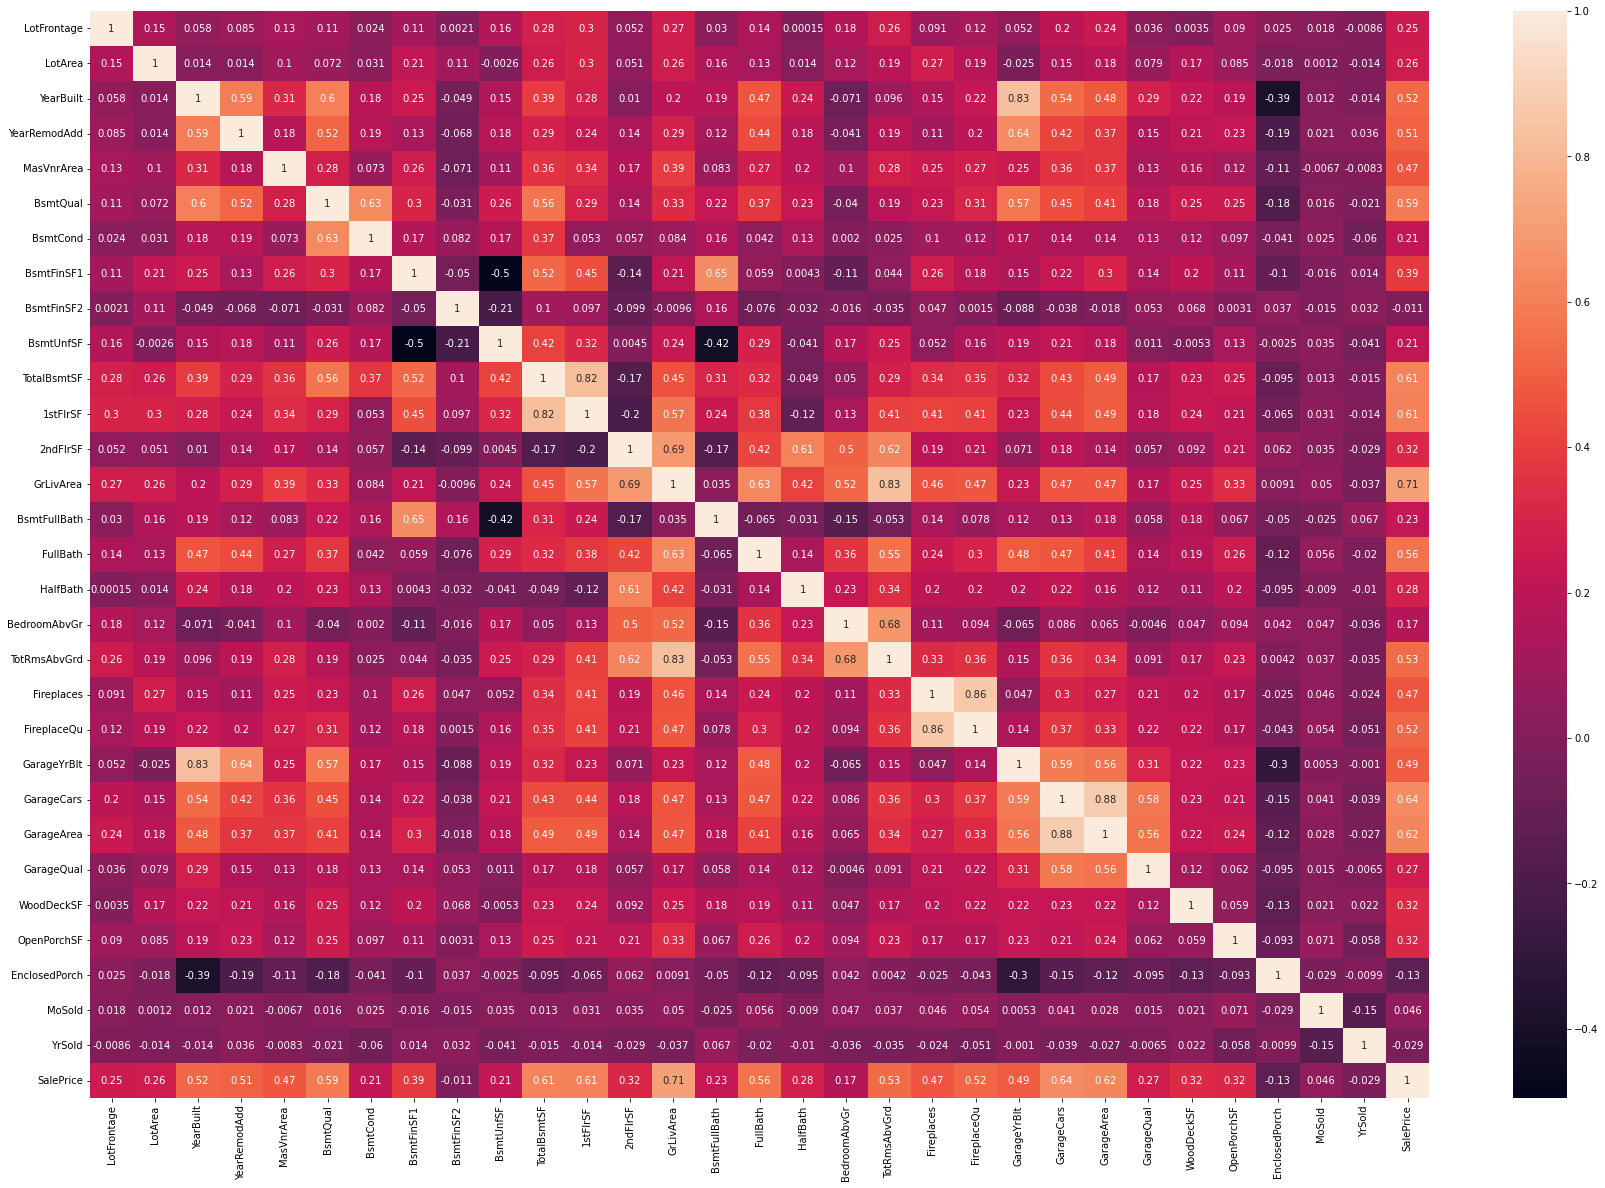

In [57]:
# correlation matrix
data_numeric = df_house.select_dtypes(include=['float64', 'int64'])
cor = data_numeric.corr()
# plotting correlations
plt.figure(figsize=(30,20))
sns.heatmap(cor, annot=True)
plt.show()

In [58]:
corr = cor.abs()
unstack = corr.unstack()
sorted = unstack.sort_values(ascending=False)
df_corr = pd.DataFrame(sorted)
print(df_corr[(df_corr[0] < 1.0) & (df_corr[0] > 0.70)])

                                  0
GarageArea   GarageCars    0.882475
GarageCars   GarageArea    0.882475
FireplaceQu  Fireplaces    0.863241
Fireplaces   FireplaceQu   0.863241
GarageYrBlt  YearBuilt     0.825667
YearBuilt    GarageYrBlt   0.825667
GrLivArea    TotRmsAbvGrd  0.825489
TotRmsAbvGrd GrLivArea     0.825489
1stFlrSF     TotalBsmtSF   0.819530
TotalBsmtSF  1stFlrSF      0.819530
SalePrice    GrLivArea     0.708624
GrLivArea    SalePrice     0.708624


###Pair Plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


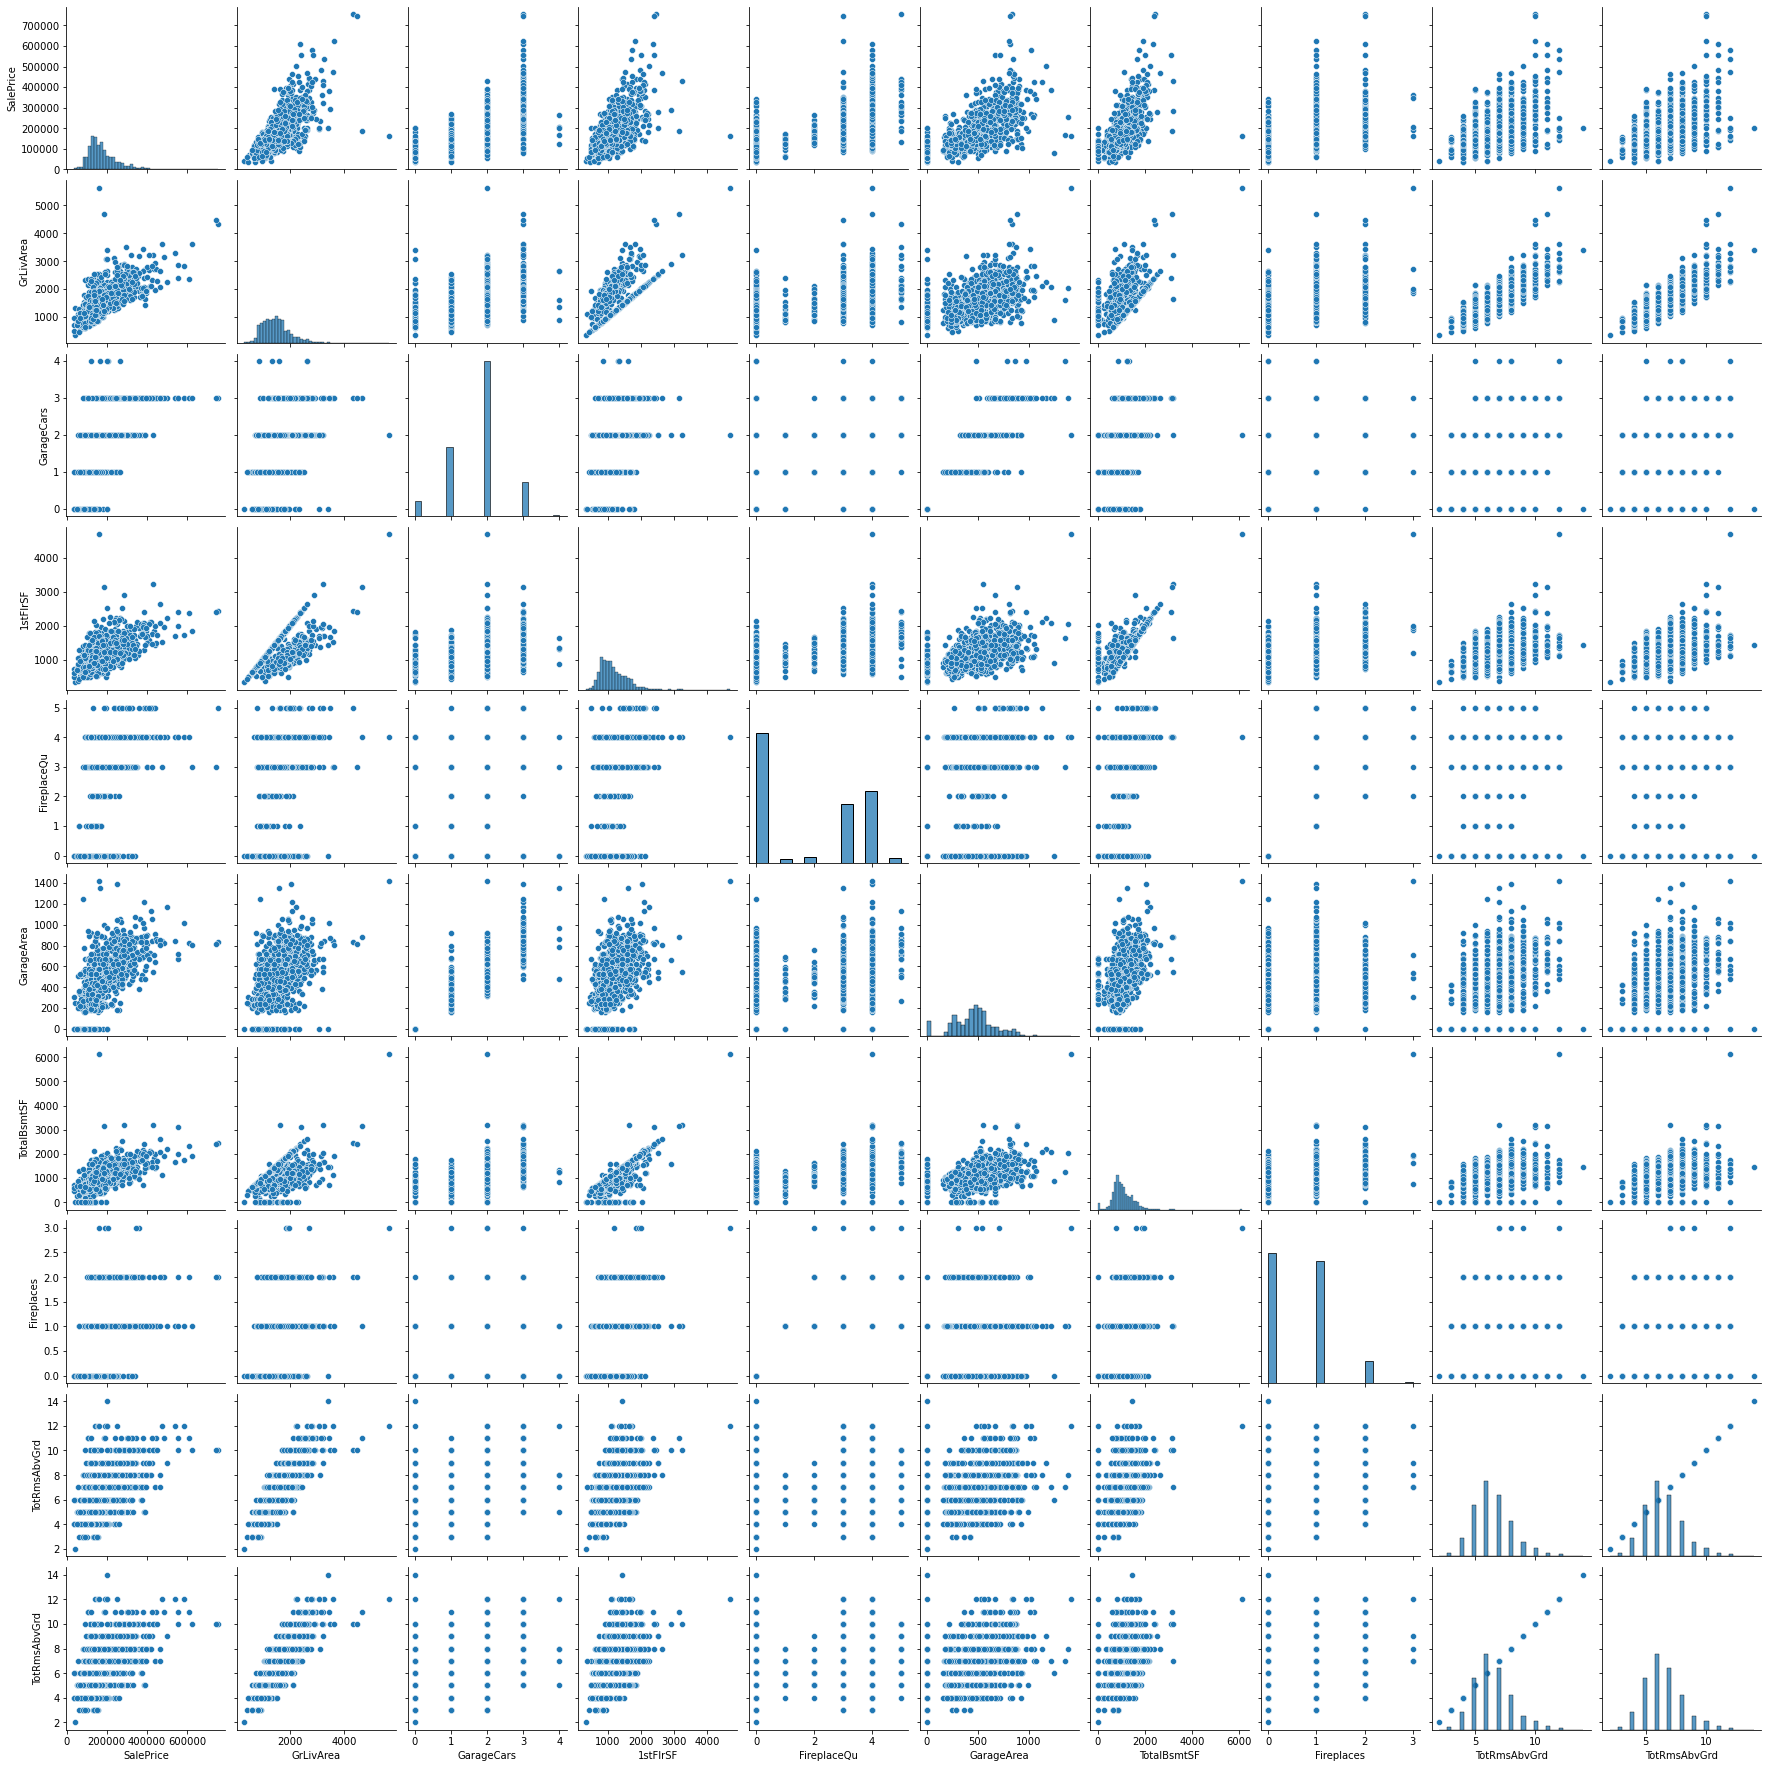

In [59]:
#  Pairplots for highly correlated variables 
cols = ['SalePrice', 'GrLivArea', 'GarageCars', '1stFlrSF', 'FireplaceQu', 'GarageArea', 'TotalBsmtSF', 'Fireplaces', 'TotRmsAbvGrd', 'TotRmsAbvGrd']
sns.pairplot(df_house, vars=cols, size = 2.5)

In [60]:
df_house.drop(['GarageCars'], axis = 1, inplace=True)
df_house.drop(['BsmtUnfSF'], axis = 1, inplace=True)
df_house.drop(['TotRmsAbvGrd'], axis = 1, inplace=True)
df_house.drop(['GarageYrBlt'], axis = 1, inplace=True)   

### Derived Variables

Dropping the following columns: YearBuilt, GarageYrBuilt, YrSold

In [61]:
df_house.shape

(1460, 55)

In [62]:
import datetime
now = datetime.datetime.now()
now

datetime.datetime(2022, 6, 23, 22, 43, 12, 322047)

In [63]:
df_house['Age of House'] = now.year - df_house['YearBuilt']
df_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age of House
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,0,61,0,No Fence,2,2008,WD,Normal,208500,19
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,298,0,0,No Fence,5,2007,WD,Normal,181500,46
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,0,42,0,No Fence,9,2008,WD,Normal,223500,21
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,0,35,272,No Fence,2,2006,WD,Abnorml,140000,107
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,192,84,0,No Fence,12,2008,WD,Normal,250000,22


In [64]:
df_house['Age of House'].isnull().sum()

0

In [65]:
df_house.drop('YearBuilt',axis=1,inplace=True)

In [66]:
df_house['Last Sold'] = now.year - df_house['YrSold']
df_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age of House,Last Sold
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,61,0,No Fence,2,2008,WD,Normal,208500,19,14
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,0,0,No Fence,5,2007,WD,Normal,181500,46,15
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,42,0,No Fence,9,2008,WD,Normal,223500,21,14
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,35,272,No Fence,2,2006,WD,Abnorml,140000,107,16
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,84,0,No Fence,12,2008,WD,Normal,250000,22,14


In [67]:
df_house['Last Sold'].value_counts()

13    338
15    329
16    314
14    304
12    175
Name: Last Sold, dtype: int64

In [68]:
df_house.drop('YrSold',axis=1,inplace=True)

### Creating Dummies

In [69]:
df_house.shape

(1460, 55)

In [70]:
 ## one hot encoding 
df_house = pd.get_dummies(df_house, drop_first=True )
df_house.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,196.0,4,3,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,0.0,4,3,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2002,162.0,4,3,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1970,0.0,3,4,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,350.0,4,3,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [71]:
df_house.shape

(1460, 213)

### Target Variable Distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

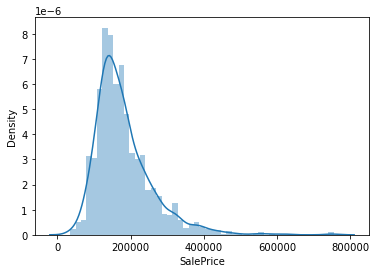

In [72]:
sns.distplot(df_house['SalePrice'])

In [73]:
df_house['SalePrice'].skew()

1.8828757597682129

Right skew observed in SalePrice column

# Data Preparation for Model Building

### Test-Train Split

In [74]:
# Splitting data into train and test set with 80:20 ratio
df_train, df_test = train_test_split(df_house, train_size=0.8, test_size=0.2, random_state=100)

In [75]:
print(df_train.shape)
print(df_test.shape)

(1168, 213)
(292, 213)


### Feature Scaling

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
# Scaler instance
scaler = MinMaxScaler()

In [78]:
# List of Numeric columns 
numeric_cols = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
# Fit the data into scaler and transform
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
133,0.000000,0.025955,0.866667,0.08500,1.0,0.75,0.178065,0.000000,0.207365,0.213889,...,0,0,0,0,1,0,0,0,1,0
290,0.339041,0.066891,0.933333,0.00000,0.8,0.75,0.000000,0.000000,0.176596,0.163657,...,0,0,1,0,0,0,0,0,0,1
24,0.000000,0.032466,0.850000,0.00000,0.6,0.75,0.033310,0.453189,0.173486,0.159259,...,0,0,0,0,1,0,0,0,1,0
1093,0.171233,0.037066,0.800000,0.10375,0.6,0.75,0.117116,0.000000,0.141408,0.191667,...,0,0,0,0,1,0,0,0,1,0
1288,0.065068,0.020398,0.833333,0.00000,0.8,0.75,0.205174,0.000000,0.245663,0.297917,...,0,0,0,0,1,0,0,0,1,0


In [79]:
df_train.describe()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.138854,0.042887,0.581621,0.064654,0.696233,0.732021,0.079963,0.032908,0.173861,0.184435,...,0.003425,0.003425,0.079623,0.002568,0.871575,0.002568,0.008562,0.014555,0.824486,0.079623
std,0.097548,0.045996,0.344743,0.114770,0.178116,0.141141,0.082155,0.113389,0.073869,0.091376,...,0.058445,0.058445,0.270825,0.050637,0.334705,0.050637,0.092172,0.119813,0.380569,0.270825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.075342,0.028979,0.283333,0.000000,0.600000,0.750000,0.000000,0.000000,0.130115,0.118519,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.140411,0.038538,0.733333,0.000000,0.800000,0.750000,0.069454,0.000000,0.162848,0.165162,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.198630,0.048087,0.900000,0.100000,0.800000,0.750000,0.127746,0.000000,0.213421,0.239236,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
df_train.shape

(1168, 213)

### X-train and Y-train

In [81]:
# Popping out the SalePrice column for y_train
y_train = df_train.pop('SalePrice')
x_train = df_train

In [82]:
y_train.head()

133     0.257048
290     0.275420
24      0.165394
1093    0.154284
1288    0.337592
Name: SalePrice, dtype: float64

In [83]:
x_train.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
133,0.000000,0.025955,0.866667,0.08500,1.0,0.75,0.178065,0.000000,0.207365,0.213889,...,0,0,0,0,1,0,0,0,1,0
290,0.339041,0.066891,0.933333,0.00000,0.8,0.75,0.000000,0.000000,0.176596,0.163657,...,0,0,1,0,0,0,0,0,0,1
24,0.000000,0.032466,0.850000,0.00000,0.6,0.75,0.033310,0.453189,0.173486,0.159259,...,0,0,0,0,1,0,0,0,1,0
1093,0.171233,0.037066,0.800000,0.10375,0.6,0.75,0.117116,0.000000,0.141408,0.191667,...,0,0,0,0,1,0,0,0,1,0
1288,0.065068,0.020398,0.833333,0.00000,0.8,0.75,0.205174,0.000000,0.245663,0.297917,...,0,0,0,0,1,0,0,0,1,0


### X-test and Y-test

In [84]:
# Scale the test set variables with min-max scaler. Don't fit on test set.
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols]) 
df_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.133562,0.035991,0.350000,0.00000,0.6,0.75,0.109142,0.0,0.141408,0.113889,...,0,0,0,0,1,0,0,0,1,0
57,0.232877,0.048354,0.900000,0.00000,0.8,0.75,0.000000,0.0,0.140753,0.112963,...,0,0,0,0,1,0,0,0,1,0
780,0.143836,0.030732,0.766667,0.02375,0.8,1.00,0.000000,0.0,0.202455,0.203935,...,0,0,0,0,1,0,0,0,1,0
382,0.198630,0.037136,0.933333,0.00000,0.8,0.75,0.000000,0.0,0.153682,0.131250,...,0,0,0,0,1,0,0,0,1,0
1170,0.188356,0.040104,0.450000,0.00000,0.6,0.75,0.092488,0.0,0.179378,0.172685,...,0,0,0,0,1,0,0,0,1,0


In [85]:
# popping out the SalePrice column to create y_test
y_test = df_test.pop('SalePrice')
x_test = df_test

In [86]:
# Maintaining columns of x_train to x_test
x_test = x_test[x_train.columns]
x_test.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.133562,0.035991,0.350000,0.00000,0.6,0.75,0.109142,0.0,0.141408,0.113889,...,0,0,0,0,1,0,0,0,1,0
57,0.232877,0.048354,0.900000,0.00000,0.8,0.75,0.000000,0.0,0.140753,0.112963,...,0,0,0,0,1,0,0,0,1,0
780,0.143836,0.030732,0.766667,0.02375,0.8,1.00,0.000000,0.0,0.202455,0.203935,...,0,0,0,0,1,0,0,0,1,0
382,0.198630,0.037136,0.933333,0.00000,0.8,0.75,0.000000,0.0,0.153682,0.131250,...,0,0,0,0,1,0,0,0,1,0
1170,0.188356,0.040104,0.450000,0.00000,0.6,0.75,0.092488,0.0,0.179378,0.172685,...,0,0,0,0,1,0,0,0,1,0


# Model Building

In [87]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [88]:
lm = LinearRegression()
# Fit the model with train data
lm.fit(x_train, y_train)

LinearRegression()

In [89]:
# Predict the model with train set
y_train_pred = lm.predict(x_train)
# r2 score for the train model
metrics.r2_score(y_true = y_train, y_pred = y_train_pred)

0.8922560733422515

In [90]:
# Fit the model with test set
y_test_pred = lm.predict(x_test)
# r2 score for the test set
metrics.r2_score(y_true = y_test, y_pred = y_test_pred)

-3.933367125942607e+22

R2 score is very low.

In [91]:
# Model parameters coefficients
model_parameters = lm.coef_
# model coefficients
cols = x_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.031980442391547015),
 ('LotFrontage', 0.0990357410742286),
 ('LotArea', 0.0035140746371513064),
 ('YearRemodAdd', 0.037215740892905996),
 ('MasVnrArea', 0.04023700744484079),
 ('BsmtQual', -0.004596832080906634),
 ('BsmtCond', -0.007038066581188926),
 ('BsmtFinSF1', 0.011010232900278095),
 ('BsmtFinSF2', -0.04787235306265576),
 ('TotalBsmtSF', 0.17346315105171892),
 ('1stFlrSF', 0.15562312393007785),
 ('2ndFlrSF', 0.11666485560253079),
 ('GrLivArea', 0.03191277390479271),
 ('BsmtFullBath', 0.030195405930743106),
 ('FullBath', 0.017526259294989445),
 ('HalfBath', 0.00453907475735774),
 ('BedroomAbvGr', 0.0045558243677839005),
 ('Fireplaces', 0.011793378322412538),
 ('FireplaceQu', 0.043980271851052535),
 ('GarageArea', 0.05200524780671669),
 ('GarageQual', 0.007687507301364691),
 ('WoodDeckSF', -0.0028908437685061864),
 ('OpenPorchSF', 0.006024640476380466),
 ('EnclosedPorch', -0.004226451792974362),
 ('MoSold', -0.043450334700507603),
 ('Age of House', 0.00576025599414

### Lasso Regression

In [92]:
x_train.shape

(1168, 212)

In [93]:
y_train.shape

(1168,)

In [94]:
# Importing Lasso module
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [95]:
params = {'alpha': np.arange(0, 1, 0.0001).tolist()}

In [96]:
lasso = Lasso()

In [97]:
# Cross validation with 5 folds
folds = 5
lasso_model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
lasso_model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6004890669787222, tolerance: 0.0011587419077743666
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estim

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0, 0.0001, 0.0002, 0.00030000000000000003,
                                   0.0004, 0.0005, 0.0006000000000000001,
                                   0.0007, 0.0008, 0.0009000000000000001, 0.001,
                                   0.0011, 0.0012000000000000001,
                                   0.0013000000000000002, 0.0014, 0.0015,
                                   0.0016, 0.0017000000000000001,
                                   0.0018000000000000002, 0.0019, 0.002,
                                   0.0021000000000000003, 0.0022, 0.0023,
                                   0.0024000000000000002, 0.0025,
                                   0.0026000000000000003, 0.0027, 0.0028,
                                   0.0029000000000000002, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
# creating dataframe with lasso_model_cv results
lasso_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_results = lasso_results[lasso_results['param_alpha']<=1]
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.276613,0.083902,0.007954,0.001647,0.0,{'alpha': 0.0},-0.027245,-0.027465,-0.028573,-0.027178,...,-0.027967,0.000865,7,-0.021951,-0.022522,-0.018732,-0.021666,-0.022207,-0.021416,0.001371
1,0.084687,0.010398,0.007117,0.003690,0.0001,{'alpha': 0.0001},-0.023675,-0.024248,-0.026018,-0.024105,...,-0.024760,0.000942,1,-0.022299,-0.022586,-0.019515,-0.021574,-0.022260,-0.021647,0.001117
2,0.052281,0.005284,0.008840,0.000933,0.0002,{'alpha': 0.0002},-0.023713,-0.024153,-0.026144,-0.024370,...,-0.024909,0.001039,2,-0.022968,-0.023158,-0.020661,-0.022203,-0.022934,-0.022385,0.000921
3,0.040492,0.002932,0.009774,0.000400,0.0003,{'alpha': 0.00030000000000000003},-0.024396,-0.024665,-0.026969,-0.024739,...,-0.025504,0.001115,3,-0.023754,-0.023835,-0.021760,-0.022968,-0.023658,-0.023195,0.000781
4,0.038898,0.002821,0.007977,0.001411,0.0004,{'alpha': 0.0004},-0.024993,-0.025468,-0.027913,-0.025466,...,-0.026248,0.001174,4,-0.024511,-0.024595,-0.022705,-0.023936,-0.024447,-0.024039,0.000706


In [99]:
# Converting the 'param_alpha' datatype from object to int
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

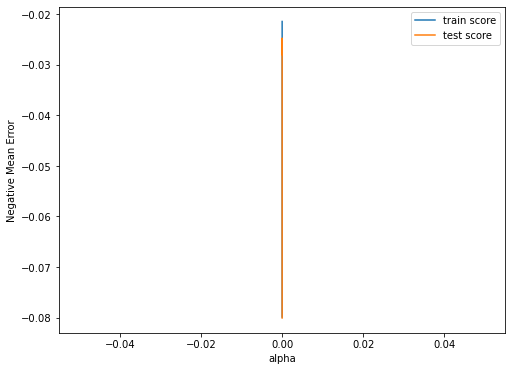

In [100]:
# Plotting mean of Train and Test score
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Error')
plt.show()

In [101]:
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train, y_train) 
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  2.13260668e-02,  0.00000000e+00,
        4.90650674e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.30334442e-01,
        0.00000000e+00,  1.59063673e-02,  6.78027759e-03,  0.00000000e+00,
        0.00000000e+00,  3.70015156e-02,  6.33766232e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.49675416e-03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  4.33222318e-03, -9.70790102e-03,
        0.00000000e+00, -0.00000000e+00, -5.02259302e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.87866451e-03, -0.00000000e+00,
       -0.00000000e+00, -

In [102]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x,3) for x in model_parameters]
cols = df_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.069),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('YearRemodAdd', 0.021),
 ('MasVnrArea', 0.0),
 ('BsmtQual', 0.049),
 ('BsmtCond', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('GrLivArea', 0.23),
 ('BsmtFullBath', 0.0),
 ('FullBath', 0.016),
 ('HalfBath', 0.007),
 ('BedroomAbvGr', 0.0),
 ('Fireplaces', 0.0),
 ('FireplaceQu', 0.037),
 ('GarageArea', 0.063),
 ('GarageQual', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('MoSold', -0.0),
 ('Age of House', -0.0),
 ('Last Sold', 0.0),
 ('MSSubClass_30', -0.0),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', 0.001),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', -0.0),
 ('MSSubClass_80', -0.0),
 ('MSSubClass_85', -0.0),
 ('MSSubClass_90', -0.0),
 ('MSSubClass_120', -0.0),
 ('MSSubClass_160', -0.0),
 ('MSSubClass_180', -0.0),
 ('MSSubClass_190', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZon

Model Evalution from Lasso

In [103]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train)
# Train set
y_train_pred = model_lasso.predict(x_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.4582465013745731


In [104]:
# Test set
y_test_pred = model_lasso.predict(x_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.3980437057171625


In [105]:
# Mean sqaured error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE: 0.08639018968764357


R2 matches well for test and train data sets

In [106]:
mod = list(zip(cols, model_parameters))

In [107]:
param = pd.DataFrame(mod)
param.columns = ['Variable', 'Coeff']
param.head()

,Variable,Coeff
0,constant,0.069
1,LotFrontage,0.000
2,LotArea,0.000
3,YearRemodAdd,0.021
4,MasVnrArea,0.000


In [108]:
param = param.sort_values((['Coeff']), axis = 0, ascending=False)
param

,Variable,Coeff
12,GrLivArea,0.230
105,OverallQual_9,0.086
0,constant,0.069
106,OverallQual_10,0.068
19,GarageArea,0.063
...,...,...
115,RoofStyle_Gable,-0.009
44,MSZoning_RM,-0.010
186,KitchenQual_TA,-0.011
61,Neighborhood_Edwards,-0.012


In [109]:
pred =pd.DataFrame(param[(param['Coeff']!=0)])
pred

,Variable,Coeff
12,GrLivArea,0.230
105,OverallQual_9,0.086
0,constant,0.069
106,OverallQual_10,0.068
19,GarageArea,0.063
5,BsmtQual,0.049
69,Neighborhood_NoRidge,0.047
18,FireplaceQu,0.037
164,BsmtExposure_Gd,0.032
104,OverallQual_8,0.028


### Ridge Regression

In [110]:


#Range of hyperparameter
params = {'alpha': np.arange(1, 1001,0.1).tolist()}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 1.1, 1.2000000000000002,
                                   1.3000000000000003, 1.4000000000000004,
                                   1.5000000000000004, 1.6000000000000005,
                                   1.7000000000000006, 1.8000000000000007,
                                   1.9000000000000008, 2.000000000000001,
                                   2.100000000000001, 2.200000000000001,
                                   2.300000000000001, 2.4000000000000012,
                                   2.5000000000000013, 2.6000000000000014,
                                   2.7000000000000015, 2.8000000000000016,
                                   2.9000000000000017, 3.0000000000000018,
                                   3.100000000000002, 3.200000000000002,
                                   3.300000000000002, 3.400000000000002,
                                   3.500000000000002, 3.6000000000000023,
      

In [111]:
# creating dataframe with model_ridge results
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=5]
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011170,0.001596,0.003789,0.000398,1.0,{'alpha': 1.0},-0.025345,-0.025451,-0.027723,-0.025066,...,-0.026184,0.001112,97,-0.021888,-0.022387,-0.018927,-0.021395,-0.022144,-0.021348,0.001255
1,0.003790,0.003116,0.001008,0.000892,1.1,{'alpha': 1.1},-0.025252,-0.025376,-0.027699,-0.025008,...,-0.026128,0.001135,91,-0.021898,-0.022390,-0.018951,-0.021397,-0.022146,-0.021356,0.001247
2,0.006249,0.007653,0.003125,0.006249,1.2,{'alpha': 1.2000000000000002},-0.025167,-0.025314,-0.027679,-0.024955,...,-0.026080,0.001158,84,-0.021908,-0.022395,-0.018977,-0.021401,-0.022147,-0.021365,0.001239
3,0.007370,0.009199,0.003156,0.006233,1.3,{'alpha': 1.3000000000000003},-0.025087,-0.025258,-0.027664,-0.024905,...,-0.026037,0.001180,79,-0.021919,-0.022401,-0.019003,-0.021408,-0.022148,-0.021376,0.001231
4,0.009373,0.007653,0.000000,0.000000,1.4,{'alpha': 1.4000000000000004},-0.025015,-0.025204,-0.027649,-0.024860,...,-0.025997,0.001200,74,-0.021931,-0.022407,-0.019029,-0.021415,-0.022153,-0.021387,0.001223


In [112]:
# Converting the 'param_alpha' datatype from object to int
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

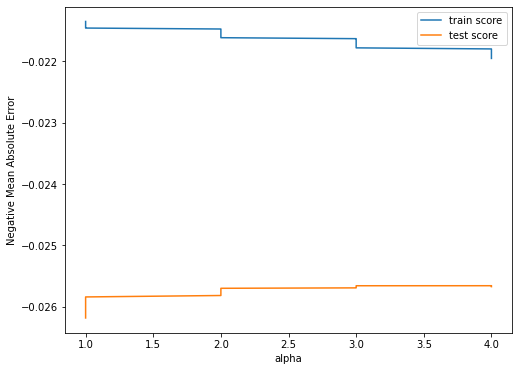

In [113]:
# Plotting mean of Train and Test score with alpha
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.show()

In [114]:
# check the coefficient values with lambda = 2.0

alpha =2.0
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)
ridge.coef_

array([-1.44420200e-02,  4.69624567e-02,  8.23944120e-03,  3.72007611e-02,
        4.10835173e-02,  4.66562583e-03,  8.94679055e-03,  1.10757639e-02,
        2.50910986e-02,  7.93464663e-02,  1.07342888e-01,  1.06873017e-01,
        2.79586991e-02,  4.50606605e-02,  2.05427501e-02,  1.57556396e-02,
        1.30124641e-02,  1.27682062e-02,  4.79516453e-02,  2.28130558e-02,
        1.12289115e-02, -1.52569999e-03,  4.79063380e-03, -4.93465773e-03,
       -2.27947192e-02,  5.47929833e-03, -5.19186600e-03, -2.79209818e-03,
        6.26369650e-03,  2.83333503e-03, -4.53837045e-03,  6.83478408e-03,
        2.00634765e-04,  2.72683676e-03, -3.43299125e-03, -7.23612672e-03,
       -2.00100444e-02, -2.08032537e-02, -9.93534661e-03, -1.55617119e-02,
        2.17224641e-02,  1.73689288e-02,  1.43256831e-02,  1.48926718e-02,
        8.08706162e-03, -1.82724837e-02,  8.30485650e-04,  1.87774165e-02,
        2.32136653e-02,  2.28572390e-02,  1.22011750e-02, -1.93588754e-02,
       -2.22676735e-02, -

In [115]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.026),
 ('LotFrontage', -0.014),
 ('LotArea', 0.047),
 ('YearRemodAdd', 0.008),
 ('MasVnrArea', 0.037),
 ('BsmtQual', 0.041),
 ('BsmtCond', 0.005),
 ('BsmtFinSF1', 0.009),
 ('BsmtFinSF2', 0.011),
 ('TotalBsmtSF', 0.025),
 ('1stFlrSF', 0.079),
 ('2ndFlrSF', 0.107),
 ('GrLivArea', 0.107),
 ('BsmtFullBath', 0.028),
 ('FullBath', 0.045),
 ('HalfBath', 0.021),
 ('BedroomAbvGr', 0.016),
 ('Fireplaces', 0.013),
 ('FireplaceQu', 0.013),
 ('GarageArea', 0.048),
 ('GarageQual', 0.023),
 ('WoodDeckSF', 0.011),
 ('OpenPorchSF', -0.002),
 ('EnclosedPorch', 0.005),
 ('MoSold', -0.005),
 ('Age of House', -0.023),
 ('Last Sold', 0.005),
 ('MSSubClass_30', -0.005),
 ('MSSubClass_40', -0.003),
 ('MSSubClass_45', 0.006),
 ('MSSubClass_50', 0.003),
 ('MSSubClass_60', -0.005),
 ('MSSubClass_70', 0.007),
 ('MSSubClass_75', 0.0),
 ('MSSubClass_80', 0.003),
 ('MSSubClass_85', -0.003),
 ('MSSubClass_90', -0.007),
 ('MSSubClass_120', -0.02),
 ('MSSubClass_160', -0.021),
 ('MSSubClass_180', -0.01)

Model evaluation Ridge Regression

In [116]:
model_ridge = Ridge(alpha=2)
model_ridge.fit(x_train, y_train)

Ridge(alpha=2)

In [117]:
# Train set
y_train_pred = model_ridge.predict(x_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.8882479688416564


In [118]:
# Test set
y_test_pred = model_ridge.predict(x_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8799889425662868


In [119]:
# Mean squared
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE: 0.03857381371486177


In [120]:
mod_ridge =list(zip(cols, model_parameters))

In [121]:
paramR = pd.DataFrame(mod_ridge)
paramR .columns =['Variable', 'Coeff']
res = paramR.sort_values(by=['Coeff'], ascending=False)
res.head(15)

,Variable,Coeff
12,GrLivArea,0.107
11,2ndFlrSF,0.107
10,1stFlrSF,0.079
106,OverallQual_10,0.078
105,OverallQual_9,0.074
69,Neighborhood_NoRidge,0.057
19,GarageArea,0.048
2,LotArea,0.047
14,FullBath,0.045
5,BsmtQual,0.041


### Conclusion

The model performance with Ridge was good and the error was low.
It is however better to chose Lasso as it helps in feature selection and results in simpler models.